In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Leitura da imagem

img = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)
linhas = img.shape[0]
colunas = img.shape[1]

In [3]:
# Criação de um vetor <0,...,255>

lim = []
for i in range(0, 255):
    lim.append(i)

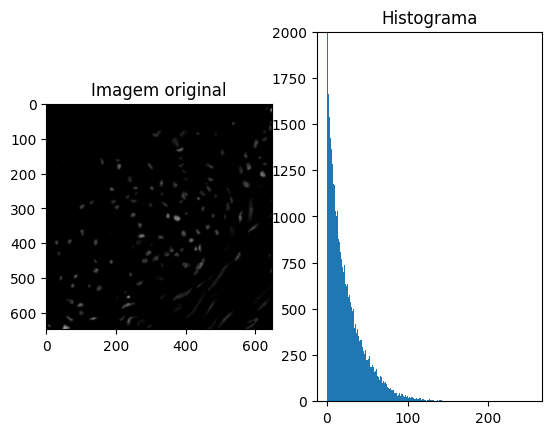

In [4]:
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(1,2,2)
histArray = img.flatten()
histogram = plt.hist(histArray, lim)
plt.title('Histograma')
plt.ylim(0,2000)
plt.show(histogram)

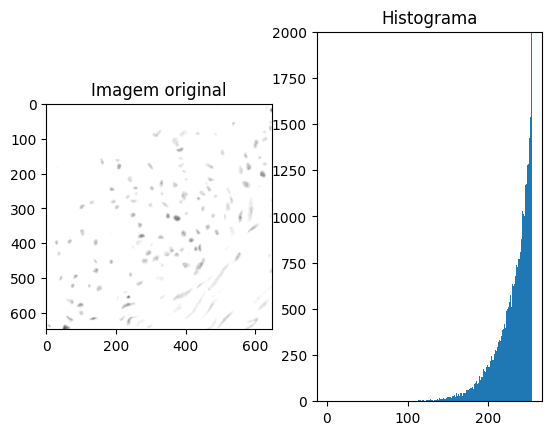

In [5]:
# Inversão da imagem

img2 = img.copy()
for x in range(0, linhas):
        for y in range(0, colunas):
                img2[x][y] = 255 - img[x][y]

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img2, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(1,2,2)
histArray2 = img2.flatten()
histogram2 = plt.hist(histArray2, lim)
plt.title('Histograma')
plt.ylim(0,2000)
plt.show(histogram2)

<p> A imagem é melhor percebida na negativa, uma vez que o fundo branco traz
 mais destaque para os objetos no cenários (agora destacados de preto)
 Vale ressaltar que em ambas imagens, há um alto contraste, o qual torna
 fácil a percepção dos objetos, contudo o fundo branco dá mais destaque.</p>

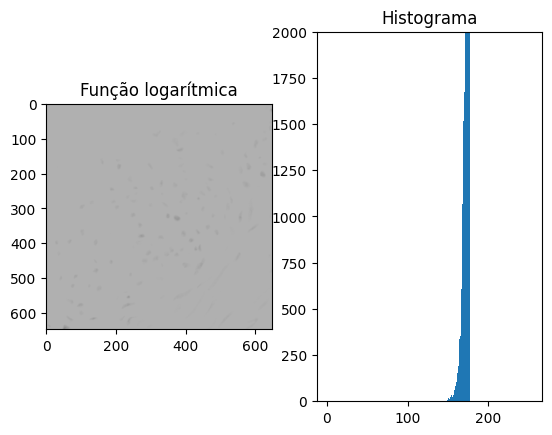

In [6]:

#Aplicando função logarítmica na imagem invertida
img3 = img2.copy()
for x in range(0, linhas):
        for y in range(0, colunas):
                img3[x][y] = 31.875 * math.log(img2[x][y] + 1, math.e)

plt.subplot(1,2,1)
plt.title('Função logarítmica')
plt.imshow(img3, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(1,2,2)
histArray3 = img3.flatten()
histogram3 = plt.hist(histArray3, lim)
plt.title('Histograma')
plt.ylim(0,2000)
plt.show(histogram3)

#Algo percebido é que a função gera o mesmo resultado para as imagens originais e invertidas

C:\Users\marci\AppData\Local\Temp\ipykernel_3860\1498654316.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


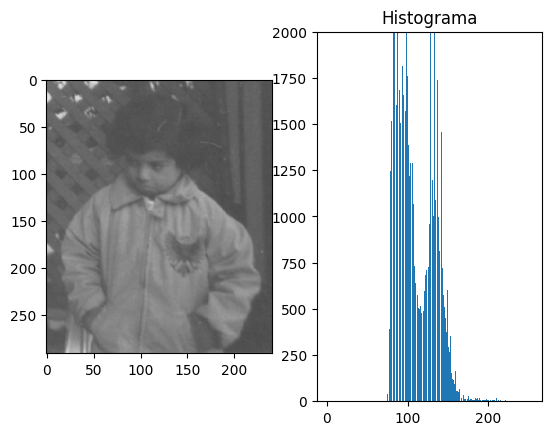

In [7]:
# Leitura da segunda imagem
img_pout = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
linhas = img_pout.shape[0]
colunas = img_pout.shape[1]

plt.title('Imagem original')
plt.subplot(1,2,1)
plt.imshow(img_pout, cmap='gray', vmin = 0, vmax = 255)

#Calculo do histograma
lim = []
for i in range(0, 255):
    lim.append(i)

plt.subplot(1,2,2)
histArray = img_pout.flatten()
histogram = plt.hist(histArray, lim)
plt.title('Histograma')
plt.ylim(0,2000)
plt.show(histogram)

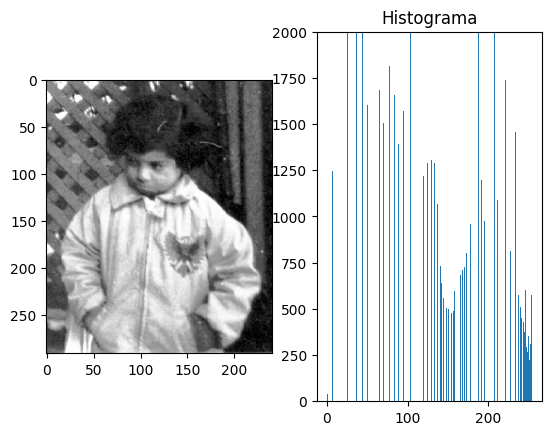

In [23]:
# Equalização da imagem

plt.subplot(1,2,1)
equalizado = cv2.equalizeHist(img_pout) 
plt.imshow(equalizado, cmap='gray', vmin = 0, vmax = 255)


plt.subplot(1,2,2)

histArray2 = equalizado.flatten()
histogram2 = plt.hist(histArray2, lim)
plt.title('Histograma')
plt.ylim(0,2000)
plt.show(histogram)

In [8]:
#Equalização do histograma
#qntIdeal = (linhas*colunas)/255 -> 273.88235294117646
#Quantidade ideal de pixels em cada nível

#Calculo do vetor de probabilidade
contador = 0
value = 0
img2 = img_pout.copy()
probabilityArray = []

while value <= 255:

    for x in range(0, linhas):
        for y in range(0, colunas):
            if img2[x][y] == value:
                contador += 1

    probabilityArray.append(contador/(linhas*colunas))
    contador = 0
    value += 1

print(probabilityArray)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.86368843069874e-05, 0.0005441008018327606, 0.0, 0.005569873997709049, 0.017826460481099655, 0.0, 0.021735395189003436, 0.0, 0.051947308132875146, 0.04504581901489118, 0.02922394043528064, 0.0, 0.022923825887743412, 0.03457903780068729, 0.0, 0.02411225658648339, 0.0, 0.021563573883161512, 0.0, 0.02595933562428408, 0.02376861397479954, 0.01990263459335624, 0.0, 0.022508591065292096, 0.03811569301260023, 0.025214776632302406, 0.0, 0.01985967926689576, 0.017439862542955327, 0.018427835051546392, 0.0, 0.01872852233676976, 0.018442153493699886, 0.015292096219931271, 0.010481099656357388, 0.009149484536082475, 0.00800400916380

In [13]:
#Calculo do vetor cdf - distribuição acumulada
cdfArray = []
for i in range(0, 256):
    if i == 0:
       cdfArray.append(round(probabilityArray[i],4)) 
    else:   
        cdfArray.append(round((cdfArray[i-1] + probabilityArray[i-1]), 4))

print(cdfArray)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005, 0.0005, 0.0061, 0.0239, 0.0239, 0.0456, 0.0456, 0.0975, 0.1425, 0.1717, 0.1717, 0.1946, 0.2292, 0.2292, 0.2533, 0.2533, 0.2749, 0.2749, 0.3009, 0.3247, 0.3446, 0.3446, 0.3671, 0.4052, 0.4304, 0.4304, 0.4503, 0.4677, 0.4861, 0.4861, 0.5048, 0.5232, 0.5385, 0.549, 0.5581, 0.5661, 0.5661, 0.5743, 0.5815, 0.5887, 0.5887, 0.5961, 0.6029, 0.6029, 0.6099, 0.6185, 0.6366, 0.6464, 0.6565, 0.6565, 0.6669, 0.6784, 0.6921, 0.7318, 0.7318, 0.749, 0.7629, 0.7773, 0.8122, 0.8278, 0.8278, 0.8406, 0.8655, 0.8797, 0.8913, 0.8913, 0.8913, 0.9122, 0.9226, 0.9308, 0.9381, 0.9445, 0.9507, 0.9561, 0.9647, 0.9689, 0.9727, 0.972

In [14]:
#Calculo do vetor Tr(Rk)
TrRk = [] 
for i in range(0, 256):
    TrRk.append(round((255*cdfArray[i]),2))

print(TrRk)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.13, 1.56, 6.09, 6.09, 11.63, 11.63, 24.86, 36.34, 43.78, 43.78, 49.62, 58.45, 58.45, 64.59, 64.59, 70.1, 70.1, 76.73, 82.8, 87.87, 87.87, 93.61, 103.33, 109.75, 109.75, 114.83, 119.26, 123.96, 123.96, 128.72, 133.42, 137.32, 140.0, 142.32, 144.36, 144.36, 146.45, 148.28, 150.12, 150.12, 152.01, 153.74, 153.74, 155.52, 157.72, 162.33, 164.83, 167.41, 167.41, 170.06, 172.99, 176.49, 186.61, 186.61, 191.0, 194.54, 198.21, 207.11, 211.09, 211.09, 214.35, 220.7, 224.32, 227.28, 227.28, 227.28, 232.61, 235.26, 237.35, 239.22, 240.85, 242.43, 243.81, 246.0, 247.07, 248.04, 248.04, 249.34, 249.9, 250.33, 250.74,

In [15]:
#Calculo do vetor Sk
Sk = [] 
for i in range(0, 256):
    frac, whole = math.modf(TrRk[i])
    if frac >= 0.5:
        Sk.append(math.ceil(TrRk[i]))
    else:
        Sk.append(math.floor(TrRk[i]))
        
print(Sk)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 6, 12, 12, 25, 36, 44, 44, 50, 58, 58, 65, 65, 70, 70, 77, 83, 88, 88, 94, 103, 110, 110, 115, 119, 124, 124, 129, 133, 137, 140, 142, 144, 144, 146, 148, 150, 150, 152, 154, 154, 156, 158, 162, 165, 167, 167, 170, 173, 176, 187, 187, 191, 195, 198, 207, 211, 211, 214, 221, 224, 227, 227, 227, 233, 235, 237, 239, 241, 242, 244, 246, 247, 248, 248, 249, 250, 250, 251, 251, 251, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,

In [22]:
#Calculo do vetor Ps(Sk)